In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [3]:
log_paths = ["/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100.0/all_aug_20_conver_10_limit_0_fedpet_128_32_roberta-large.log",
"/home/cdq/FedPet/log/mnli/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/all_aug_20_conver_10_limit_0_fedpet_1024_32_roberta-large.log",
"/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100.0/fedpet_128_32_roberta-large.log",

"/home/cdq/FedPet/log/mnli/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/all_aug_20_conver_10_limit_0_fedpet_1024_32_roberta-large.log",
"/home/cdq/FedPet/log/mnli/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/fedclassifier_1024_32_roberta-large.log",
"/home/cdq/FedPet/log/mnli/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/fedpet_1024_32_roberta-large.log",


"/home/cdq/FedPet/log/yahoo/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/all_aug_20_conver_10_limit_0_fedpet_256_32_roberta-large.log",
"/home/cdq/FedPet/log/yahoo/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/fedclassifier_256_32_roberta-large.log",
"/home/cdq/FedPet/log/yahoo/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/fedpet_256_32_roberta-large.log",

"/home/cdq/FedPet/log/yelp-full/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/all_aug_20_conver_10_limit_0_fedpet_512_32_roberta-large.log",
"/home/cdq/FedPet/log/yelp-full/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/fedclassifier_512_32_roberta-large.log",
"/home/cdq/FedPet/log/yelp-full/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_100.0/fedpet_512_32_roberta-large.log"
]

In [4]:
# influence of datapoint

root_path = "/home/cdq/FedPet/log/yelp-full/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_0.001"
filenames = ["new_all_aug_4_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_8_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_16_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_32_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_64_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_100_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
]



new_all_aug_4_conver_0_limit_0.0_fedpet_256_32_roberta-large.log
max accuracy is 0.5746400000000002
new_all_aug_8_conver_0_limit_0.0_fedpet_256_32_roberta-large.log
max accuracy is 0.6155799999999999
new_all_aug_16_conver_0_limit_0.0_fedpet_256_32_roberta-large.log
max accuracy is 0.61026
new_all_aug_32_conver_0_limit_0.0_fedpet_256_32_roberta-large.log
max accuracy is 0.61114
new_all_aug_64_conver_0_limit_0.0_fedpet_256_32_roberta-large.log
max accuracy is 0.61906
new_all_aug_100_conver_0_limit_0.0_fedpet_256_32_roberta-large.log
max accuracy is 0.58916
[0.5746400000000002, 0.6155799999999999, 0.61026, 0.61114, 0.61906, 0.58916]


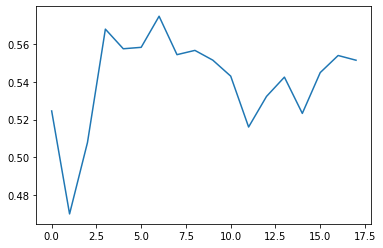

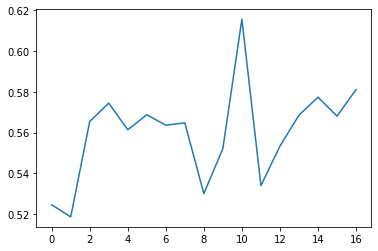

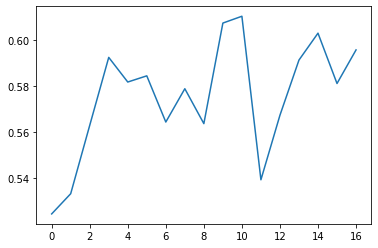

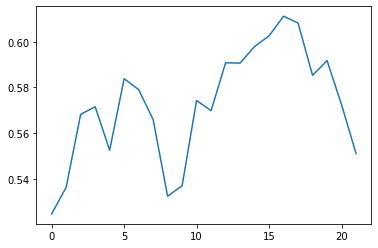

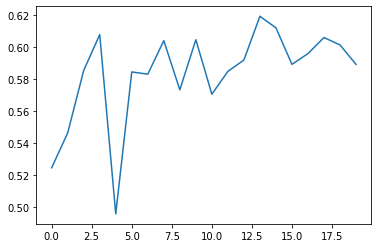

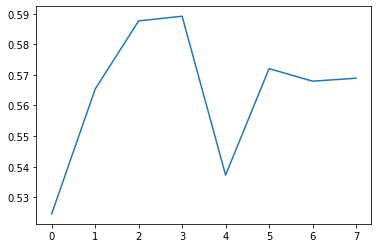

In [5]:
max_acc = []
for filename in filenames:
    log_path = os.path.join(root_path, filename)
    fig = plt.figure()
    # plt.title(log_path)
    iter = 1000
    phrase = 'aggregated model performance is'
    with open(log_path) as f:
        f = f.readlines()
    df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
    for line in f:
        if phrase in line:
            gen = int(re.findall(r'Gen (.+?) ',line)[0])
            
            acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
            df[0][gen]=acc

    df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
    if df.empty:
        print(f"Bug: {log_path}")

    print(filename)
    # print(df)
    print(f"max accuracy is {np.max(df[0])}")
    max_acc.append(np.max(df[0]))

    # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
    iter = len(df.index)
    y_mean = []
    for j in range(iter):
        y = np.array(df.iloc[j])

        y_mean.append(pd.DataFrame(y).dropna().mean())
        # plt.scatter(j, y)
            
    plt.plot(range(iter),y_mean)
    fig.savefig(f"../fig/augment-yelp-{filename}.pdf")


print(max_acc)

In [9]:
max_acc

[0.5732309870550162,
 0.6472916666666667,
 0.6836771844660194,
 0.5245327669902912,
 0.5295400485436894,
 0.5144046655879181]

/home/cdq/FedPet/log/mnli/all_1000/seed_42/pattern_0/alpha_0_beta_0_gamma_100.0/bitfit_1e-3_fedpet_64_1000_roberta-large.log
           0
0   0.360696
1   0.343464
2   0.359579
3   0.364819
4   0.410066
..       ...
72  0.530651
73  0.539094
74  0.496062
75  0.571354
76  0.573131

[77 rows x 1 columns]
max accuracy is 0.6143833603020498


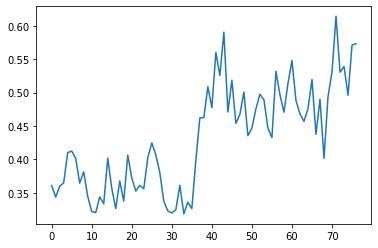

In [3]:
# performance 
fig = plt.figure()
iter = 1000

log_path = "/home/cdq/FedPet/log/mnli/all_1000/seed_42/pattern_0/alpha_0_beta_0_gamma_100.0/bitfit_1e-3_fedpet_64_1000_roberta-large.log"

phrase = 'aggregated model performance is'
with open(log_path) as f:
    f = f.readlines()
df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
for line in f:
    if phrase in line:
        gen = int(re.findall(r'Gen (.+?) ',line)[0])
        
        acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
        df[0][gen]=acc

df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
if df.empty:
    print(f"Bug: {log_path}")

print(log_path)
print(df)
print(f"max accuracy is {np.max(df[0])}")

# df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
iter = len(df.index)
y_mean = []
for j in range(iter):
    y = np.array(df.iloc[j])

    y_mean.append(pd.DataFrame(y).dropna().mean())
    # plt.scatter(j, y)
        
plt.plot(range(iter),y_mean)
plt.savefig("../fig/a.png")



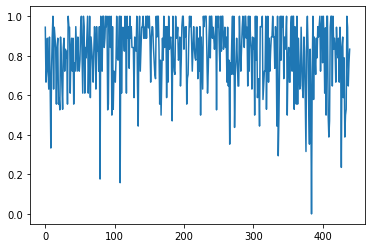

In [39]:
# correct ratio
fig = plt.figure()
iter = 1000

phrase = 'After correct: Inference correct ratio is'
with open(log_path) as f:
    f = f.readlines()
df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
gen = 0
for line in f:
    
    if phrase in line:
        # gen = int(re.findall(r'Gen (.+?) ',line)[0])
        
        acc = float(re.findall(r'is ?(\d+\.\d+)',line)[0])
        df[0][gen]=acc
        gen = gen + 1

df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
if df.empty:
    print(f"Bug: {log_path}")

# df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
iter = len(df.index)
y_mean = []
for j in range(iter):
    y = np.array(df.iloc[j])

    y_mean.append(pd.DataFrame(y).dropna().mean())
    # plt.scatter(j, y)
        
plt.plot(range(iter),y_mean)
plt.savefig("../fig/b.png")



In [40]:
y = [float(x) for x in y_mean]
np.mean(y)

0.8123651374425368